<a href="https://colab.research.google.com/github/JonathanKolb/MLNNs_A2/blob/playing-around/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="loading"></a>
# 1. Load packages and data

Mount the Google Drive to the runtime so I can access files from there.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Assignment_2/input"
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Assignment_2/input
/content/drive/MyDrive/Assignment_2/input


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import random
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold

In [5]:
from tensorflow.keras.models import save_model

In [6]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
print(os.listdir("../input"))


['train-io.txt', 'test-i.txt', 'model.h5']


In [7]:
# Load data as Pandas dataframe
df = pd.read_csv('../input/train-io.txt', sep=" ", header=None,
                 names=['num_01', 'num_02', 'num_03', 'num_04', 'num_05',
                        'num_06', 'num_07', 'num_08', 'num_09', 'num_10', 'label'])

In [8]:
df.head()

,num_01,num_02,num_03,num_04,num_05,num_06,num_07,num_08,num_09,num_10,label
0,-0.852507,1.666773,1.804535,-0.716671,1.453874,-2.127368,-1.122697,0.177708,1.100541,1.124238,1
1,-2.457481,1.934705,1.687973,-0.135270,1.834924,-0.646744,0.317887,-1.934858,0.593166,0.432247,0
2,-3.254799,3.487586,3.333810,-0.104991,-0.522417,-3.673875,-3.931949,0.016380,1.955265,1.118143,1
3,-3.204966,3.592170,4.498665,-0.117003,0.539003,-3.146038,-0.655503,-0.692667,0.796502,1.120190,0
4,-1.381102,0.748178,1.732860,-0.288241,0.539120,-1.916870,-1.419793,-0.561423,0.936609,0.289147,1


In [9]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

        
display_all(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
num_01,100000.0,-2.259926,1.005840,-6.073768,-2.953758,-2.258861,-1.564537,1.337427
num_02,100000.0,2.445663,1.108057,-1.250762,1.655183,2.444047,3.238214,5.997658
num_03,100000.0,2.874081,1.324896,-2.072370,1.951810,2.878329,3.800928,7.739980
num_04,100000.0,-0.230782,0.478650,-2.073440,-0.563800,-0.232659,0.101010,1.494884
num_05,100000.0,0.592157,0.949180,-2.821405,-0.060338,0.591340,1.245209,4.037723
num_06,100000.0,-2.450873,1.194906,-6.810437,-3.273778,-2.453019,-1.625890,1.994193
num_07,100000.0,-1.117645,1.152760,-5.033446,-1.921612,-1.115276,-0.313028,2.998529
num_08,100000.0,-0.637249,0.634570,-2.860057,-1.082620,-0.637222,-0.191713,1.521207
num_09,100000.0,0.972720,0.530816,-1.073676,0.606474,0.970453,1.343528,2.977788
num_10,100000.0,0.689605,0.686217,-1.647074,0.212772,0.691525,1.168163,3.240423


# 2. Preprocessing

Rescale the numbers using the standard scaler from SKLearn

In [10]:
continuous = ['num_01', 'num_02', 'num_03', 'num_04', 'num_05','num_06', 'num_07', 'num_08', 'num_09', 'num_10']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [11]:
display_all(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
num_01,100000.0,-8.855139e-18,1.000005,-3.791718,-0.689807,0.001059,0.691355,3.576484
num_02,100000.0,-1.097078e-16,1.000005,-3.335969,-0.713396,-0.001458,0.715266,3.205623
num_03,100000.0,2.216538e-16,1.000005,-3.733484,-0.696112,0.003207,0.699566,3.672684
num_04,100000.0,-3.510081e-17,1.000005,-3.849718,-0.695748,-0.003923,0.693185,3.605293
num_05,100000.0,-4.021672e-17,1.000005,-3.596346,-0.687433,-0.000861,0.688020,3.630063
num_06,100000.0,-1.440270e-16,1.000005,-3.648476,-0.688681,-0.001796,0.690420,3.720031
num_07,100000.0,5.684342e-17,1.000005,-3.396909,-0.697431,0.002055,0.697995,3.570731
num_08,100000.0,-1.926992e-16,1.000005,-3.502873,-0.701850,0.000042,0.702110,3.401463
num_09,100000.0,3.959499e-17,1.000005,-3.855209,-0.689971,-0.004271,0.698567,3.777350
num_10,100000.0,1.072209e-16,1.000005,-3.405179,-0.694876,0.002797,0.697389,3.717238


Make a train-test split.

In [12]:
X=df[['num_01', 'num_02', 'num_03', 'num_04', 'num_05','num_06', 'num_07', 'num_08', 'num_09', 'num_10']]
y=df['label']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.25, 
                                   shuffle=True)
  
# printing out train and test sets
  
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
         num_01    num_02    num_03    num_04    num_05    num_06    num_07  \
98980  1.191595 -2.192368 -0.333857  0.617355  0.010250 -0.960373  0.058936   
69824  0.489847 -0.693832 -0.308699  0.218039  0.277151  0.468261  0.778401   
9928   0.567621  0.661593 -0.808196  1.293250 -2.073279 -1.271670 -2.226947   
75599  1.153112 -2.475059  0.049792  0.920796 -0.705509 -0.595545  1.321443   
95621 -0.888175  1.013693 -0.087555 -0.865296 -0.517852 -0.744144 -1.914060   

         num_08    num_09    num_10  
98980  0.805746  0.383228  0.057513  
69824 -0.337044 -1.090647 -1.170822  
9928  -0.482241  1.740340 -1.679616  
75599 -0.848443 -1.392888 -1.674530  
95621  0.546681  2.290893  1.626418  

X_test : 
         num_01    num_02    num_03    num_04    num_05    num_06    num_07  \
75721 -1.110732  0.909671 -0.382519  0.367877 -1.071533  1.257043 -0.732816   
80184  1.581756  0.352322 -1.542950 -0.115110  0.917856  1.350713  0.700714   
19864 -1.266550  0.497932  1.872731 -0

## 3. Random Model


Build a model that randomly assigns a 0 or a 1 to a given number.

In [13]:
random_model = df
random_model['prediction'] = [random.randrange(2) for i in range(df.shape[0])]

In [14]:
random_model.head(10)

,num_01,num_02,num_03,num_04,num_05,num_06,num_07,num_08,num_09,num_10,label,prediction
0,1.399255,-0.702936,-0.807272,-1.015129,0.907858,0.270738,-0.004382,1.284272,0.240802,0.633378,1,1
1,-0.196409,-0.461132,-0.895251,0.199545,1.309312,1.509857,1.245306,-2.044873,-0.715042,-0.375042,0,1
2,-0.989101,0.940321,0.346994,0.262804,-1.174255,-1.023518,-2.441374,1.030039,1.851018,0.624497,1,1
3,-0.939558,1.034706,1.226203,0.237708,-0.056000,-0.581776,0.400902,-0.087332,-0.331978,0.627480,0,0
4,0.873726,-1.531955,-0.861371,-0.120046,-0.055877,0.446902,-0.262110,0.119492,-0.068029,-0.583577,1,0
5,2.356699,-0.840430,-1.841954,0.644387,-0.247439,-1.091114,-0.914751,0.326168,1.261114,-2.001532,1,0
6,0.009854,0.217855,-0.557266,0.352125,-1.795845,-0.372473,-0.839014,-1.679701,1.047944,-1.947266,0,1
7,-1.804245,0.416689,1.246839,-0.577911,0.298218,-0.481386,0.116290,-0.939726,0.909438,1.245933,0,1
8,0.780843,-1.274101,0.476748,0.080330,-0.162740,-0.556241,1.554669,-0.175885,-1.109489,-0.570529,0,0
9,-0.968113,0.986541,0.479241,-1.332778,0.273202,0.037415,-1.214840,0.726079,1.289919,1.984208,0,0


In [15]:
random_model['align'] = np.where(random_model['label'] == random_model['prediction'], 1, 0)

In [16]:
random_accuracy = np.sum(random_model['align']) / df.shape[0]

In [17]:
print('The accuracy of random guessing is: ' + str(random_accuracy))

The accuracy of random guessing is: 0.49842


## 4. Neural Network with Cross Validation

### Create neural network model


In [18]:
def create_model(lyrs=[256,128,64,32], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [22]:
model = create_model(lyrs=[256,128,64,32,16], act='relu')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2816      
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

### Train model


In [ ]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train,
    # df[['num_01', 'num_02', 'num_03', 'num_04', 'num_05','num_06', 'num_07', 'num_08', 'num_09', 'num_10']], df['label'],
                     epochs=100, batch_size=32, validation_split=0.2, verbose=2)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))

### Assess results

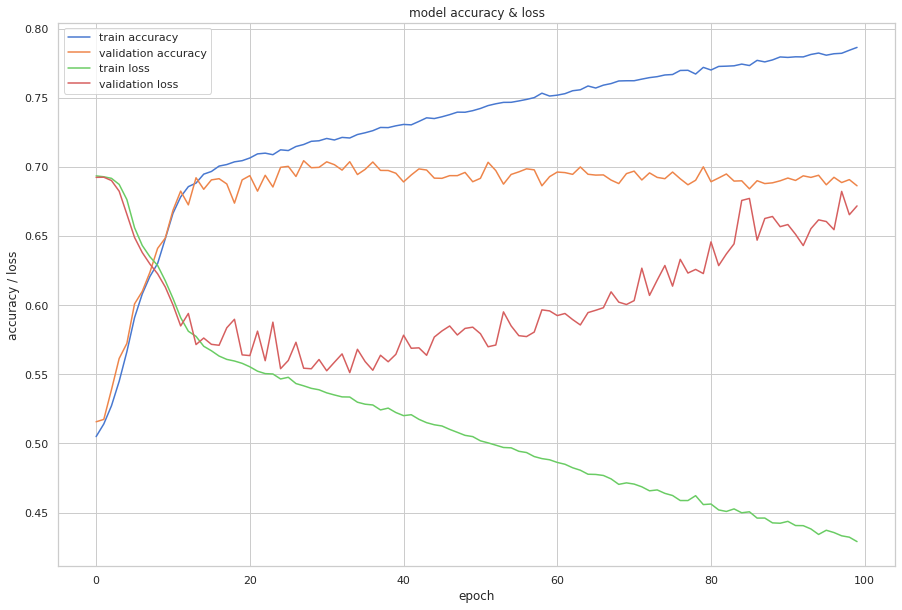

In [24]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy', 'train loss', 'validation loss'], loc='upper left')
plt.show()

In [25]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.6763 - accuracy: 0.6858


[0.6762887239456177, 0.6858400106430054]

In [27]:
test_df = X_test
test_df['prediction'] = model.predict(test_df)
test_df['prediction'] = test_df['prediction'].apply(lambda x: round(x,0)).astype('int')
test_df['label'] = y_test
test_df['align'] = np.where(test_df['label'] == test_df['prediction'], 1, 0)

782/782 [==============================] - 1s 2ms/step


In [29]:
test_df.head(10)

,num_01,num_02,num_03,num_04,num_05,num_06,num_07,num_08,num_09,num_10,prediction,label,align
75721,-1.110732,0.909671,-0.382519,0.367877,-1.071533,1.257043,-0.732816,-0.628859,0.113531,-0.032254,1,1,1
80184,1.581756,0.352322,-1.542950,-0.115110,0.917856,1.350713,0.700714,0.765162,-1.265925,-1.125145,1,0,0
19864,-1.266550,0.497932,1.872731,-0.919516,-0.780669,-0.795630,1.160835,-0.420840,-0.951446,-0.277150,0,1,0
76699,0.237527,-0.555251,0.977402,1.112833,-0.721125,-0.744767,0.179859,1.556587,-1.277393,-0.464328,1,0,0
92991,-0.142589,-0.498934,-0.148956,0.039250,1.154649,1.390860,2.090723,-0.399721,-1.708687,-0.411541,0,1,0
76434,0.706592,-1.423800,-0.848527,0.673152,0.556668,-1.025232,-0.932689,0.015444,1.611019,0.027236,1,1,1
84004,0.807653,-0.612889,-1.703249,1.563813,-0.431954,0.116807,-0.177502,-0.074239,0.262066,-0.821597,0,0,1
80917,1.119234,-0.201274,-0.493439,0.322967,-0.698422,0.174450,-0.175911,2.087341,-0.736000,0.220996,0,0,1
60767,-0.357069,-0.734467,0.630204,0.345801,-0.303226,-0.556720,-0.046743,1.135265,-0.170137,0.917367,1,1,1
50074,-0.281750,0.173442,-0.596971,1.617857,-0.897829,-0.624425,-0.275448,-1.565577,0.349828,-1.282135,1,0,0


In [30]:
print('The accuracy of the neural network on the unseen data is: ' + str(np.sum(test_df['align']) / test_df.shape[0]))

The accuracy of the neural network on the unseen data is: 0.68584


## 4.2 Grid search
### 4.2.1 batch size and epochs

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32]
epochs = [10, 20]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2, n_jobs=-1)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.502720 using {'batch_size': 16, 'epochs': 10}
0.502720 (0.004983) with: {'batch_size': 16, 'epochs': 10}
0.499707 (0.001490) with: {'batch_size': 16, 'epochs': 20}
0.502653 (0.004634) with: {'batch_size': 32, 'epochs': 10}
0.500840 (0.000261) with: {'batch_size': 32, 'epochs': 20}


### 4.2.2 Optimization Algorithm

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................opt=SGD; total time= 1.1min
[CV] END ............................................opt=SGD; total time= 1.1min
[CV] END ............................................opt=SGD; total time= 1.4min
[CV] END ............................................opt=SGD; total time= 1.4min
[CV] END ............................................opt=SGD; total time= 1.4min
[CV] END ........................................opt=RMSprop; total time= 1.2min
[CV] END ........................................opt=RMSprop; total time= 2.1min
[CV] END ........................................opt=RMSprop; total time= 1.2min
[CV] END ........................................opt=RMSprop; total time= 1.2min
[CV] END ........................................opt=RMSprop; total time= 1.2min
[CV] END ........................................opt=Adagrad; total time= 1.4min
[CV] END ........................................

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.502213 using {'opt': 'Nadam'}
0.501853 (0.004825) with: {'opt': 'SGD'}
0.501827 (0.004739) with: {'opt': 'RMSprop'}
0.499947 (0.006019) with: {'opt': 'Adagrad'}
0.499333 (0.003911) with: {'opt': 'Adadelta'}
0.501973 (0.005059) with: {'opt': 'Adam'}
0.502213 (0.005296) with: {'opt': 'Nadam'}


### 4.2.3 Hidden neurons

In [ ]:
seed(42)
set_seed(42)

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=10, batch_size=16, verbose=0)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...........................................lyrs=[8]; total time= 1.4min
[CV] END ...........................................lyrs=[8]; total time= 1.4min
[CV] END ...........................................lyrs=[8]; total time= 1.9min
[CV] END ...........................................lyrs=[8]; total time= 1.1min
[CV] END ...........................................lyrs=[8]; total time= 1.1min
[CV] END ..........................................lyrs=[10]; total time= 1.1min
[CV] END ..........................................lyrs=[10]; total time= 1.1min
[CV] END ..........................................lyrs=[10]; total time= 1.4min
[CV] END ..........................................lyrs=[10]; total time= 1.1min
[CV] END ..........................................lyrs=[10]; total time= 1.0min
[CV] END .......................................lyrs=[10, 5]; total time= 1.4min
[CV] END .......................................l

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.504520 using {'lyrs': [12, 8, 4]}
0.501973 (0.005059) with: {'lyrs': [8]}
0.502280 (0.004762) with: {'lyrs': [10]}
0.502720 (0.004979) with: {'lyrs': [10, 5]}
0.504427 (0.006097) with: {'lyrs': [12, 6]}
0.504520 (0.004687) with: {'lyrs': [12, 8, 4]}


In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=10, batch_size=16, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............................................dr=0.0; total time= 1.1min
[CV] END .............................................dr=0.0; total time= 1.1min
[CV] END .............................................dr=0.0; total time= 1.2min
[CV] END .............................................dr=0.0; total time= 1.2min
[CV] END .............................................dr=0.0; total time= 1.4min
[CV] END ............................................dr=0.01; total time= 1.4min
[CV] END ............................................dr=0.01; total time= 1.4min
[CV] END ............................................dr=0.01; total time= 1.1min
[CV] END ............................................dr=0.01; total time= 1.4min
[CV] END ............................................dr=0.01; total time= 1.1min
[CV] END ............................................dr=0.05; total time= 1.4min
[CV] END ........................................

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.503787 using {'dr': 0.1}
0.501973 (0.005059) with: {'dr': 0.0}
0.502600 (0.002968) with: {'dr': 0.01}
0.502840 (0.003693) with: {'dr': 0.05}
0.503787 (0.007014) with: {'dr': 0.1}
0.501947 (0.003709) with: {'dr': 0.2}
0.502173 (0.002587) with: {'dr': 0.5}


In [ ]:
# create final model
model = create_model(lyrs=[8], dr=0.1)

print(model.summary())

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_222 (Dense)           (None, 8)                 88        
                                                                 
 dropout_100 (Dropout)       (None, 8)                 0         
                                                                 
 dense_223 (Dense)           (None, 1)                 9         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=10, batch_size=16, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2344/2344 [==============================] - 5s 2ms/step - loss: 0.6931 - accuracy: 0.5045

accuracy: 50.45%


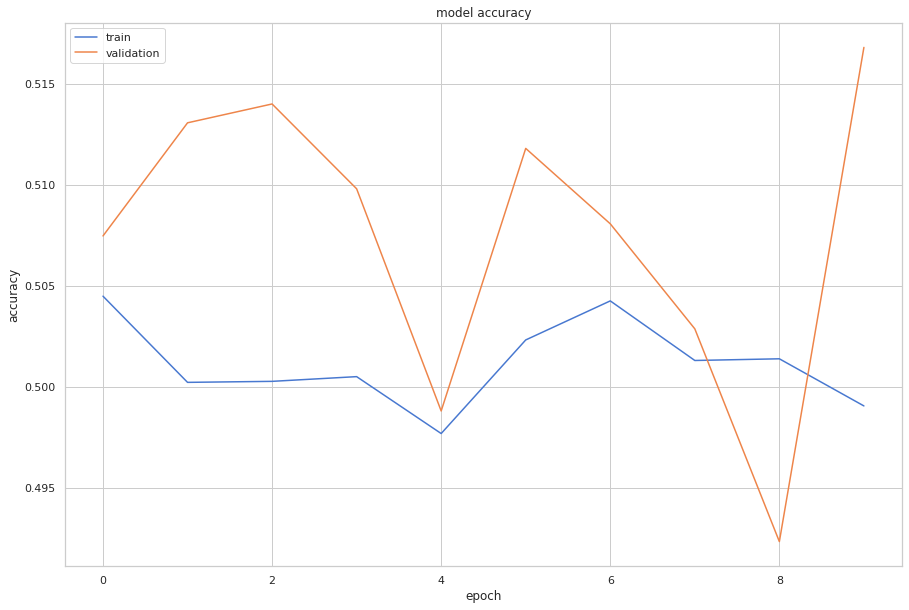

In [ ]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 5. Other Classifiers

In [ ]:
seed_var = 42

In [ ]:
# model = LogisticRegression(penalty='none', max_iter = 100000) # best 0.45
# model = LogisticRegression(penalty='l1', C=temp_c, solver='liblinear', max_iter = 1000) # best 0.42
# model = LogisticRegression(penalty='l2', C=temp_c, solver='liblinear', max_iter = 1000) # best 0.42
# model = DecisionTreeClassifier() # best 0.5
# model = SVC(kernel='linear') # 0.34
model = SVC(kernel='sigmoid') # 0.5


In [ ]:
m = 'SVC Sigmoid'
temp_c = 100
temp_deg = None

eval_matrix = pd.DataFrame(
    columns = ['classifier', 'C_value', 'degree',
                'Fold 1 F1', 'Fold 2 F1', 'Fold 3 F1',
                'Fold 4 F1', #'Fold 5 F1',
                'F1 average']
)

skf = StratifiedKFold(n_splits=4)
fold_no = 1
temp_list = []
random.seed(seed_var)
for train_index, test_index in skf.split(X_train[['num_01', 'num_02', 'num_03', 'num_04', 'num_05','num_06', 'num_07', 'num_08', 'num_09', 'num_10']], y_train):
  train = X_train.iloc[train_index,:]
  test = X_train.iloc[test_index,:]
  X_train_temp, X_test_temp = train[[
      'num_01', 'num_02', 'num_03', 'num_04', 'num_05','num_06', 'num_07', 'num_08', 'num_09', 'num_10'
      ]], test[[
          'num_01', 'num_02', 'num_03', 'num_04', 'num_05','num_06', 'num_07', 'num_08', 'num_09', 'num_10'
      ]]
  y_train_temp = y_train.iloc[train_index]
  y_test_temp = y_train.iloc[test_index]
  random.seed(seed_var)
  model.fit(X_train_temp, y_train_temp)
  predictions = model.predict(X_test_temp)
  temp_list.append(f1_score(y_test_temp, predictions, average='weighted'))
  fold_no += 1
eval_matrix = eval_matrix.append({
        'classifier': m, 
        'C_value': temp_c,
        'degree': temp_deg, 
        'Fold 1 F1': temp_list[0], 
        'Fold 2 F1': temp_list[1],
        'Fold 3 F1': temp_list[2],
        'Fold 4 F1': temp_list[3],
        #'Fold 5 F1': temp_list[4],
        'F1 average': np.mean(temp_list) 
    }, ignore_index=True)

In [ ]:
eval_matrix

,classifier,C_value,degree,Fold 1 F1,Fold 2 F1,Fold 3 F1,Fold 4 F1,F1 average
0,none,100,None,0.506661,0.495326,0.497591,0.50067,0.500062


# x. Make predictions for the unlabeled data

Load the data to be predicted

In [ ]:
# Load data as Pandas dataframe
unlabeled_data = pd.read_csv('../input/test-i.txt', sep=" ", header=None,
                 names=['num_01', 'num_02', 'num_03', 'num_04', 'num_05',
                        'num_06', 'num_07', 'num_08', 'num_09', 'num_10'])

In [ ]:
unlabeled_data.head(10)

,num_01,num_02,num_03,num_04,num_05,num_06,num_07,num_08,num_09,num_10
0,-2.594116,1.855527,2.724305,-0.204641,0.774350,-1.975059,-0.769447,-1.855881,0.997831,0.007212
1,-0.940903,1.442394,0.599031,-0.844581,2.981113,0.707824,1.352913,-0.825582,0.198402,0.976310
2,-3.199796,4.878265,3.162526,-1.213153,0.307438,-1.240265,-1.678305,-0.639494,1.108504,1.372675
3,-2.407269,2.823782,4.407804,-0.456866,1.888080,-2.127489,-0.675040,-0.150679,0.546404,1.470138
4,-0.702502,1.580839,2.270906,-0.545130,0.296036,-3.285296,-1.657834,0.045244,1.053267,0.245438
5,-2.691957,3.575437,3.518913,-0.304353,-1.003984,-3.848012,-3.732328,-1.043563,1.884800,0.233058
6,-3.204943,5.161712,2.811713,-0.948767,-0.719065,-1.521608,-2.226328,-0.546484,1.109119,0.991317
7,-3.937514,5.310633,4.188463,-1.002521,0.078249,-2.687297,-1.467165,-1.836831,1.437945,0.364033
8,-1.673174,0.972873,2.540266,0.021879,2.243066,-2.945877,-0.651543,-0.064658,1.138258,1.511876
9,-2.792630,4.945745,3.154692,-1.521820,0.128121,-1.727303,-2.015069,0.073933,1.329041,1.913461


In [ ]:
labeled_data = unlabeled_data
labeled_data['output'] = model.predict(labeled_data)
labeled_data['output'] = labeled_data['output'].apply(lambda x: round(x,0)).astype('int')

313/313 [==============================] - 1s 1ms/step


In [ ]:
labeled_data.head(10)

,num_01,num_02,num_03,num_04,num_05,num_06,num_07,num_08,num_09,num_10,output
0,-2.594116,1.855527,2.724305,-0.204641,0.774350,-1.975059,-0.769447,-1.855881,0.997831,0.007212,1
1,-0.940903,1.442394,0.599031,-0.844581,2.981113,0.707824,1.352913,-0.825582,0.198402,0.976310,1
2,-3.199796,4.878265,3.162526,-1.213153,0.307438,-1.240265,-1.678305,-0.639494,1.108504,1.372675,1
3,-2.407269,2.823782,4.407804,-0.456866,1.888080,-2.127489,-0.675040,-0.150679,0.546404,1.470138,1
4,-0.702502,1.580839,2.270906,-0.545130,0.296036,-3.285296,-1.657834,0.045244,1.053267,0.245438,1
5,-2.691957,3.575437,3.518913,-0.304353,-1.003984,-3.848012,-3.732328,-1.043563,1.884800,0.233058,1
6,-3.204943,5.161712,2.811713,-0.948767,-0.719065,-1.521608,-2.226328,-0.546484,1.109119,0.991317,1
7,-3.937514,5.310633,4.188463,-1.002521,0.078249,-2.687297,-1.467165,-1.836831,1.437945,0.364033,1
8,-1.673174,0.972873,2.540266,0.021879,2.243066,-2.945877,-0.651543,-0.064658,1.138258,1.511876,1
9,-2.792630,4.945745,3.154692,-1.521820,0.128121,-1.727303,-2.015069,0.073933,1.329041,1.913461,1


In [ ]:
np.savetxt(r'../results/test-o-hat.txt', unlabeled_data.output, fmt='%d')

In [ ]:
# saving the final model
save_model(model, "../output/model.h5")